# Library 

In [10]:
import datetime
import operator
import matplotlib.pyplot as plt
from ipywidgets import interact
from IPython.display import Markdown as md
from datetime import date, timedelta, datetime
from numpy import sqrt
from pandas import read_csv, to_datetime
from prettytable import PrettyTable
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# Load Data 

In [34]:
df = read_csv('csv/confirmed_acc.csv').iloc[39:]
df = df.reset_index()

# manual update apabila update data utama terlambat
last_date = to_datetime(df['date'].iloc[-1], format='%m/%d/%Y')
data = [
            ['4/11/2020', 3842],
            ['4/12/2020', 4241],
            ['4/13/2020', 4557],
            ['4/14/2020', 4839],
            ['4/15/2020', 5136],
            ['4/16/2020', 5527],
            ['4/17/2020', 5923],
            ['4/18/2020', 6248],
            ['4/19/2020', 6575],
            ['4/20/2020', 6760],
            ['4/21/2020', 7135],
            ['4/22/2020', 7418],
            ['4/23/2020', 7775],
            ['4/24/2020', 8211],
            ['4/25/2020', 8607],
            ['4/26/2020', 8882],
            ['4/27/2020', 9096],
            ['4/28/2020', 9511],
            ['4/29/2020', 9771],
            ['4/30/2020', 10118],
            ['5/1/2020', 10551],
            ['5/2/2020', 10843],
            ['5/3/2020', 11192],
            ['5/4/2020', 11587],
            ['5/5/2020', 12071],
            ['5/6/2020', 12438],
            ['5/7/2020', 12776],
            ['5/8/2020', 13112],
            ['5/9/2020', 13645],
            ['5/10/2020', 14023],
            ['5/11/2020', 14265],
            ['5/12/2020', 14749],
            ['5/13/2020', 15438],
            ['5/14/2020', 16006],
            ['5/15/2020', 16496],
            ['5/16/2020', 17025],
            ['5/17/2020', 17514],
            ['5/18/2020', 18010],
            ['5/19/2020', 18496],
            ['5/20/2020', 19189],
            ['5/21/2020', 20162],
            ['5/22/2020', 20796],
            ['5/23/2020', 21745],
            ['5/24/2020', 22271],
            ['5/25/2020', 22750],
            ['5/26/2020', 23165],
            ['5/27/2020', 23851],
            ['5/28/2020', 24538],
            ['5/29/2020', 25216],
            ['5/30/2020', 25773],
            ['5/31/2020', 26473],
            ['6/1/2020', 26770 ]
        ]

for k,v in data:
    if datetime.strptime(k, "%m/%d/%Y") > last_date:
        df = df.append({'date' : k, 'cases' : v} ,ignore_index=True)

# update last_date
last_date = to_datetime(df['date'].iloc[-1], format='%m/%d/%Y')

# Explore Data

In [35]:
df['index'] = df.index
df.columns = ['indeks', 'tanggal', 'kasus']
df

,indeks,tanggal,kasus
0,0,3/1/2020,0
1,1,3/2/2020,2
2,2,3/3/2020,2
3,3,3/4/2020,2
4,4,3/5/2020,2
...,...,...,...
88,88,5/28/2020,24538
89,89,5/29/2020,25216
90,90,5/30/2020,25773
91,91,5/31/2020,26473


In [36]:
df.to_excel('xlsx/koronaIndonesia_PreddictSampai01062020.xlsx', index = False)

# Machine Learning 

### Model polynomial Regression (Degree = 2)

In [25]:
degree = 2

x = df['indeks'].values.reshape(df['indeks'].size,1)
y = df['kasus'].values.reshape(df['kasus'].size,1)
polynomial_features= PolynomialFeatures(degree=degree)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)

## Looping

In [26]:
def forecast_days_after(n_days_after):
    # mengembalikan prediksi model regresi polynomial
    model_pred = model.predict(polynomial_features.fit_transform([[n_days_after]]))
    return '{:d}'.format(int(round(model_pred[0][0])))

start_date = to_datetime(df['tanggal'].iloc[0], format='%m/%d/%Y')
last_date = to_datetime(df['tanggal'].iloc[-1], format='%m/%d/%Y')

def display_forecast_days_after(n_days_after):
    # mengembalikan prediksi model regresi polynomial
    end_date = start_date + timedelta(days=n_days_after)
    model_pred = model.predict(polynomial_features.fit_transform([[n_days_after]]))
    return end_date.strftime("%d %B %Y"), '{:d}'.format(int(round(model_pred[0][0])))

def days_passed_timedelta():
    # mengembalikan hasil objek timedelta
    # berapa hari telah lewat sejak tanggal awal (start_date)
    last_date = to_datetime(df['tanggal'].iloc[-1], format='%m/%d/%Y')
    return last_date.date() - start_date.date() 

def date_days_after(n_days_after, date_format="%d %B %Y", **kwargs):
    tanggal = start_date + timedelta(days=n_days_after)
    return tanggal.date().strftime(date_format)

def display_tabel_prediksi(days_after):
    # tabel prediksi
    days_passed = days_passed_timedelta().days
    tabel_prediksi = PrettyTable(['ke-', 'tanggal','prediksi'])
    for x in range(days_passed+1,days_after+1):
        tabel_prediksi.add_row([x, date_days_after(x, date_format="%d-%m-%Y"), forecast_days_after(x)])
    print(tabel_prediksi)
    
def display_tabel_realisasi(lookback):
    # tabel prediksi
    days_passed = days_passed_timedelta().days
    tabel_realisasi = PrettyTable(['tanggal','pred', 'real', 'p-r'])
    for x in range(days_passed, days_passed-lookback+1, -1):
        pred_ = int(forecast_days_after(x))
        real_ = y[x][0]
        eval_ = pred_ - real_    
        tabel_realisasi.add_row([date_days_after(x, date_format="%d-%m-%Y"), pred_, real_, eval_])
    print(tabel_realisasi)
    
def display_equation(model):
    for coef in model.coef_:
        pass
    streq = "$y = " +str(model.intercept_[0])
    for i,c in enumerate(coef):
        j = len(coef)-i-1
        if abs(c) > c:
            sign = "-"
        else:
            sign = "+"
        if i > 1:
            streq += sign +str(abs(c)) + " \cdot x^{"+str(i)+"}"
        elif i == 1:
            streq += sign +str(abs(c)) + " \cdot x"

    streq =   streq + "$"
    return md(streq)

def display_widget_forecast_days_after():
    print('data terakhir adalah data hari ke-' + str(days_passed_timedelta().days) + \
          ', untuk mendapatkan prediksi ke depan geser slider ke kanan (gunakan tombol panah kanan -> pada keyboard):')
    @interact(x=(days_passed_timedelta().days+1, 365,1))
    def h(x=days_passed_timedelta().days+1):
        tabel_prediksi = PrettyTable(['hari ke-x', 'tanggal','prediksi akumulasi'])
        tabel_prediksi.add_row([x, date_days_after(x), forecast_days_after(x)])
        print(tabel_prediksi)

In [27]:
# tabel parameter
# tabel parameter
tabel_parameter = PrettyTable(['parameter', 'nilai'])
tabel_parameter.add_row(['polynomial\ndegree', degree])
tabel_parameter.add_row(['RMSE','{:.10}'.format(rmse)])
tabel_parameter.add_row(['R^2', '{:.10}'.format(r2)])

## Visualisasi

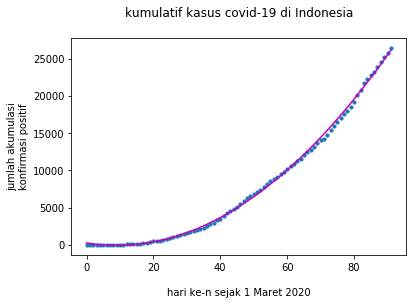

+------------+--------------+
| parameter  |    nilai     |
+------------+--------------+
| polynomial |      2       |
|   degree   |              |
|    RMSE    | 257.2807761  |
|    R^2     | 0.9989513603 |
+------------+--------------+


$y = 258.3899167437321-71.22625286344622 \cdot x+3.9064454588909268 \cdot x^{2}$

In [28]:
plt.scatter(x, y, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.title('kumulatif kasus covid-19 di Indonesia\n')
plt.xlabel('\nhari ke-n sejak 1 Maret 2020')
plt.ylabel('jumlah akumulasi\nkonfirmasi positif')

plt.plot(x, y_poly_pred, color='m')
plt.show()
print(tabel_parameter)
display_equation(model)

# Prediksi Harian 

In [31]:
# tabel prediksi hingga hari ke 60
display_tabel_prediksi(92)

+-----+------------+----------+
| ke- |  tanggal   | prediksi |
+-----+------------+----------+
|  92 | 01-06-2020 |  26770   |
+-----+------------+----------+


In [32]:
# widget appear in editor but not displayed when published;
# download notebook to display widget;
# display_widget_forecast_days_after()

display_forecast_days_after(100)

('09 June 2020', '32200')

# Realease Harian 

In [33]:
# tabel prediksi vs realisasi hingga 21 hari yang lalu
# p - r = negatif pertanda situasi lebih buruk daripada perkiraan
# p - r = positif pertanda situasi lebih baik daripada perkiraan
display_tabel_realisasi(21)

+------------+-------+-------+------+
|  tanggal   |  pred |  real | p-r  |
+------------+-------+-------+------+
| 31-05-2020 | 26126 | 26473 | -347 |
| 30-05-2020 | 25490 | 25773 | -283 |
| 29-05-2020 | 24862 | 25216 | -354 |
| 28-05-2020 | 24242 | 24538 | -296 |
| 27-05-2020 | 23630 | 23851 | -221 |
| 26-05-2020 | 23025 | 23165 | -140 |
| 25-05-2020 | 22428 | 22750 | -322 |
| 24-05-2020 | 21839 | 22271 | -432 |
| 23-05-2020 | 21258 | 21745 | -487 |
| 22-05-2020 | 20685 | 20796 | -111 |
| 21-05-2020 | 20119 | 20162 | -43  |
| 20-05-2020 | 19562 | 19189 | 373  |
| 19-05-2020 | 19012 | 18496 | 516  |
| 18-05-2020 | 18470 | 18010 | 460  |
| 17-05-2020 | 17935 | 17514 | 421  |
| 16-05-2020 | 17409 | 17025 | 384  |
| 15-05-2020 | 16890 | 16496 | 394  |
| 14-05-2020 | 16379 | 16006 | 373  |
| 13-05-2020 | 15876 | 15438 | 438  |
| 12-05-2020 | 15381 | 14749 | 632  |
+------------+-------+-------+------+
